In [192]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist

In [193]:
data2 = sio.loadmat('ex7data2.mat')
X = data2['X']

In [194]:
K = 3
initial_centroids = np.array([[3, 3],
                              [6, 2], 
                              [8, 5]])
max_iter = 10

In [195]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))
    for i in range(len(idx)):
        distance = dist.cdist(centroids, X[i:i+1, :]) 
        idx[i] = distance.argmin()
    return idx

In [196]:
idx = findClosestCentroids(X, initial_centroids)
print(idx[0:3])

[[ 0.]
 [ 2.]
 [ 1.]]


In [199]:
#compute means
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i:i+1, :] = X[np.where(idx==i)[0]].mean(0)
    return centroids
centroids = computeCentroids(X, idx, K)

In [200]:
centroids

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

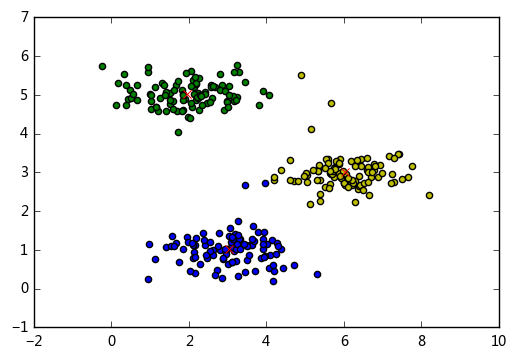

In [260]:
def plotProgress(X, centroids, idx, K, centroids_pre):
    
    ax1 = plt.subplot(111)
    color = ['g', 'b', 'y']
    for i in range(K):
        X_i = X[np.where(idx==i)[0]]
        ax1.scatter(X_i[:, 0], X_i[:, 1], c=color[i])
    #ax1.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='r')
        ax1.plot([centroids[i,0],centroids_pre[i, 0]], [centroids[i,1],centroids_pre[i, 1]], 'r-x')
    #plt.pause()
    #plt.show()
plotProgress(X, centroids, idx, K, centroids)
    

In [310]:
#K-means clustering
def Kmeans(X, initial_centroids, max_iter):
    
    #initial value
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    centroids_pre = centroids
    idx = np.zeros((m, 1))
    
    #k-means
    for i in range(max_iter):
        idx = findClosestCentroids(X, centroids)
        centroids_pre = centroids
        centroids = computeCentroids(X, idx, K)
        #plotProgress(X, centroids, idx, K, centroids_pre)
        #print(centroids)
    plt.show()
    return centroids, idx

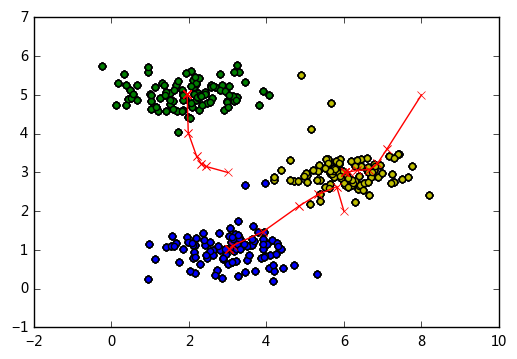

In [261]:
centroids, idx = Kmeans(X, initial_centroids, max_iter)

In [259]:
centroids

array([[ 1.95399466,  5.02557006],
       [ 3.04367119,  1.01541041],
       [ 6.03366736,  3.00052511]])

In [263]:
bird = sio.loadmat('bird_small.mat')
A = bird['A']

In [264]:
A = A/255

In [269]:
A=A.reshape(A.shape[0]*A.shape[1], A.shape[2])

In [301]:
K = 16
max_iter = 10

In [307]:
def initCentroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    rand_index = np.random.choice(m, K)
    centroids = X[rand_index]
    return centroids

In [308]:
initial_cent = initCentroids(A, K)
initial_cent

array([[ 0.70196078,  0.54509804,  0.50980392],
       [ 0.3372549 ,  0.38823529,  0.38431373],
       [ 0.65098039,  0.57254902,  0.22745098],
       [ 0.0627451 ,  0.0745098 ,  0.07058824],
       [ 0.65882353,  0.50196078,  0.45098039],
       [ 1.        ,  0.89019608,  0.8627451 ],
       [ 0.13333333,  0.14901961,  0.14901961],
       [ 0.17647059,  0.18039216,  0.23137255],
       [ 0.06666667,  0.07058824,  0.06666667],
       [ 0.35294118,  0.40784314,  0.34901961],
       [ 0.1254902 ,  0.1254902 ,  0.11764706],
       [ 0.57254902,  0.41568627,  0.16862745],
       [ 0.51372549,  0.54901961,  0.49411765],
       [ 0.75294118,  0.69411765,  0.66666667],
       [ 0.0745098 ,  0.07843137,  0.0745098 ],
       [ 0.96862745,  0.70588235,  0.48235294]])

In [311]:
centroids_bird, idx_bird = Kmeans(A, initial_cent, max_iter)

In [314]:
idxs = findClosestCentroids(A, centroids_bird)

In [368]:
X_change = centroids_bird[idxs.astype(np.uint8), :]
X_change = X_change.reshape(128,128,3)
X_change = (X_change*255).astype(np.uint8)

In [346]:
from PIL import Image


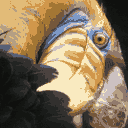

In [369]:
Image.fromarray((X_change))